In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('matmul.csv')
df = df[df['dynamic'] == False]
df.drop(['dynamic'], axis=1, inplace=True)

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,45.105016,0.405155,0.405153,0.999994,45.104724,111.327701
1,0,2,23.635397,0.202979,0.202523,0.997756,23.582354,116.442769
2,0,3,17.690708,0.138899,0.135680,0.976828,17.280780,127.364137
3,0,4,13.936630,0.103423,0.101844,0.984726,13.723756,134.753338
4,0,5,11.841009,0.085844,0.081807,0.952972,11.284149,137.936508
...,...,...,...,...,...,...,...,...
283,32,28,12.314858,0.060230,0.014989,0.248858,3.064655,204.464195
284,32,29,11.827629,0.057454,0.014492,0.252240,2.983404,205.863443
285,32,30,11.988418,0.058442,0.014009,0.239714,2.873788,205.134374
286,32,31,11.760516,0.057059,0.013609,0.238505,2.804942,206.110955


In [3]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,1.908367,1.996049,2.000526,1.002243,1.912647,0.956072
2,0,3,2.549644,2.916913,2.986088,1.023715,2.610109,0.874090
3,0,4,3.236436,3.917449,3.978188,1.015505,3.286617,0.826159
4,0,5,3.809221,4.719675,4.952554,1.049342,3.997175,0.807094
...,...,...,...,...,...,...,...,...
283,32,28,3.662650,6.726815,27.030525,4.018325,14.717717,0.544485
284,32,29,3.813530,7.051851,27.956701,3.964448,15.118543,0.540784
285,32,30,3.762383,6.932632,28.920279,4.171616,15.695215,0.542706
286,32,31,3.835292,7.100620,29.771180,4.192757,16.080450,0.540135


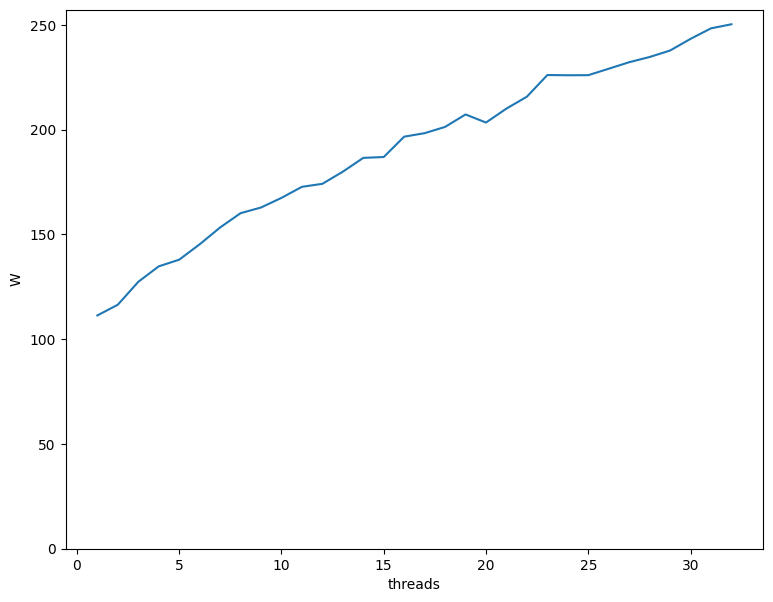

In [4]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

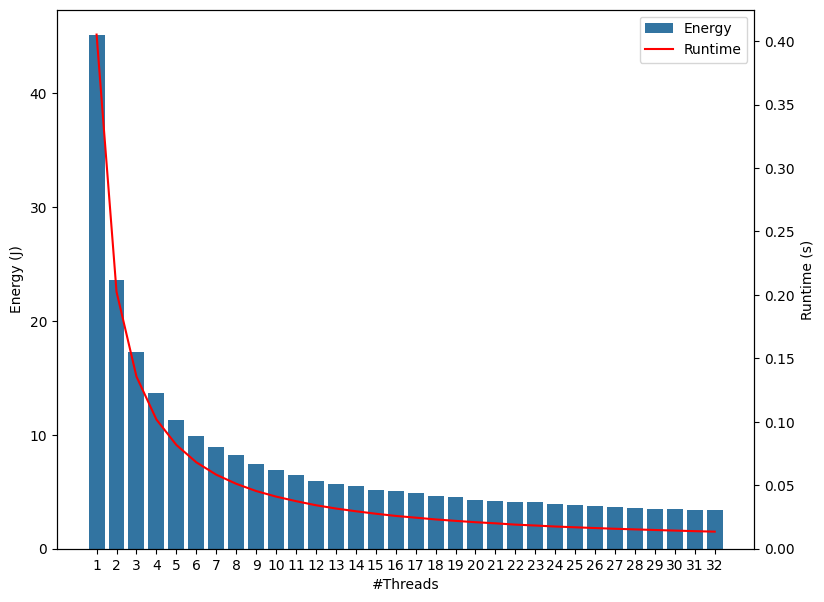

In [5]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

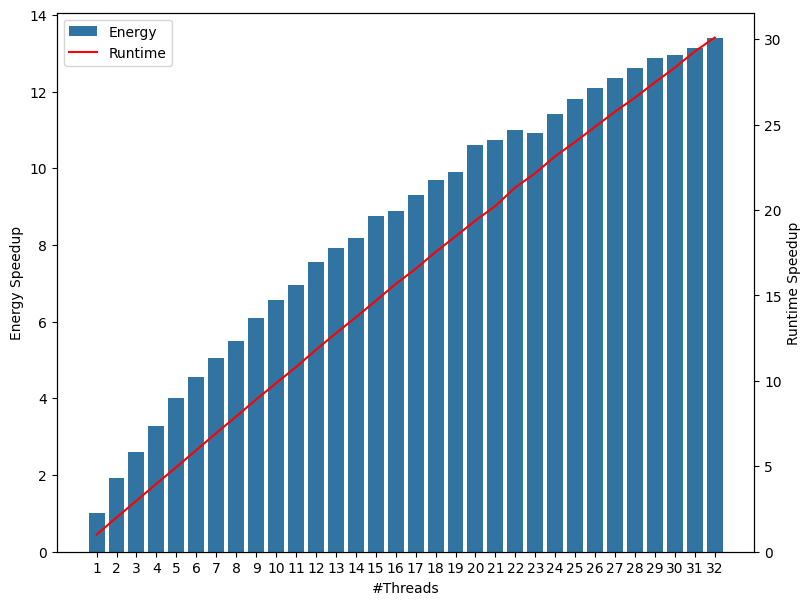

In [6]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [7]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 32 	 3.79371875
4 	 28 	 4.09395239
8 	 24 	 4.5198685
12 	 22 	 5.1951807
16 	 16 	 6.04715066
20 	 12 	 7.62088045
24 	 8 	 10.68745054
28 	 32 	 15.26264819
32 	 32 	 11.57434574


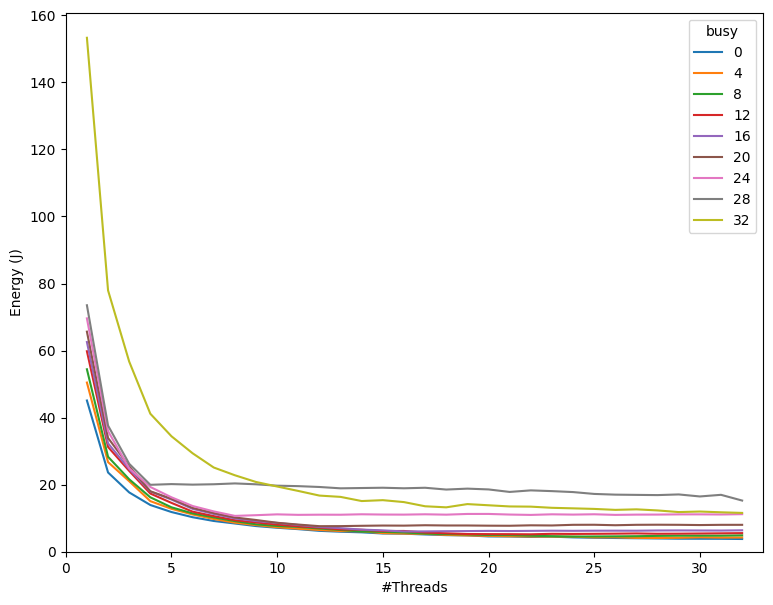

In [8]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()

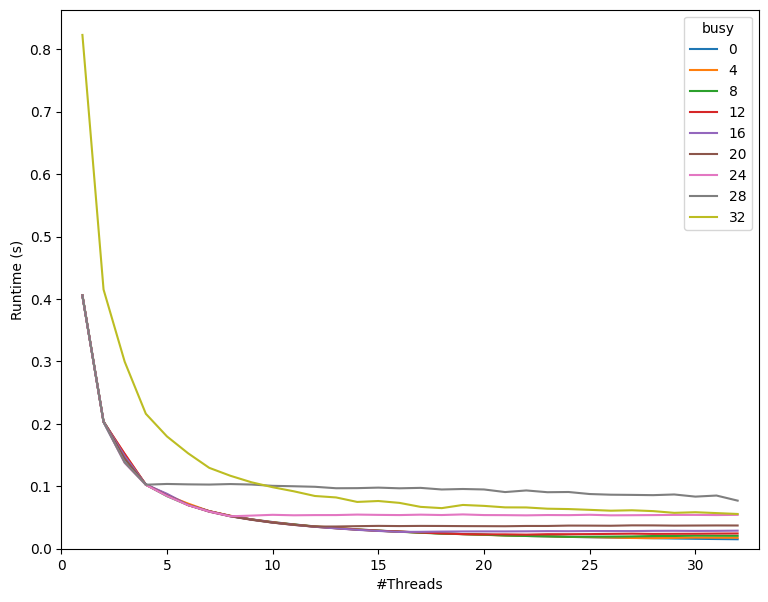

In [9]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()